In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
#Gives the total count of each country

#df.Country.value_counts()

In [6]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

# understanding/finding out each customers rec , freq and monetary values

In [7]:
#recency

day = '2012-01-01'
day = pd.to_datetime(day)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

recency = df.groupby(['CustomerID']).agg({"InvoiceDate": lambda x:((day - x.max()).days)})
# the .agg() is applied on the invoice date column, x.max() is the highest value in that column,
#subtraction gives the diff ebtween the current date and highest value, .days() converts it into day




In [8]:
# gives the number of days since the last order

recency.head()

,InvoiceDate
CustomerID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332


In [9]:
# frequency 

freq = df.drop_duplicates(subset = 'InvoiceNo').groupby(['CustomerID'])[['InvoiceNo']].count()

In [10]:
# tells us the number of times a particular customer has taken the service 

freq.head()

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [11]:
# monetory value 

In [12]:
df['total']= df['UnitPrice'] * df['Quantity']

In [13]:
money = df.groupby(['CustomerID'])[["total"]].sum()

In [14]:
money.head()


,total
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


In [15]:
df['total'].max()

168469.6

In [16]:
customer_details = df[df['CustomerID'] == 12346.0]


In [17]:
customer_details

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6


In [28]:
''' combine the 3 columns together and rename them, it gives us each customers 
recency, frequency and amount spent by them '''

RFM = pd.concat([recency, freq, money],axis=1)
recency.columns = ['Recency']
freq.columns = ['Frequency']
money.columns = ['Money']


In [29]:
RFM.head()

,Recency,Frequency,Money
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40


In [30]:
''' Standardising the data to get a common unit '''

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(RFM)

In [31]:
# inertia gives the squares of the distances between the centroid and the data points.

from sklearn.cluster import KMeans

inertia = []

for i in np.arange(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_) 

print(inertia)
#plt.plot(inertia,marker='o')
#plot.show()

C:\Users\sanku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sanku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sanku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sanku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

[13116.000000000002, 9134.642381209183, 5527.705358813834, 4046.6410066510066, 3019.7541009419733, 2370.191605669824, 1911.0028057860984, 1585.5649930710322, 1349.8082033509047, 1190.018611521914]


In [32]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM['clusters'] = (kmeans.labels_ +1)

C:\Users\sanku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [33]:

    RFM

,Recency,Frequency,Money,clusters
CustomerID,,,,
12346.0,347,2,0.00,2
12347.0,24,7,4310.00,1
12348.0,97,4,1797.24,1
12349.0,40,1,1757.55,1
12350.0,332,1,334.40,2
...,...,...,...,...
18280.0,299,1,180.60,2
18281.0,202,1,80.82,2
18282.0,29,3,176.60,1


In [34]:
final = RFM.groupby('clusters')['Recency', 'Frequency', 'Money'].mean()
final

C:\Users\sanku\AppData\Local\Temp\ipykernel_276\1789106243.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final = RFM.groupby('clusters')['Recency', 'Frequency', 'Money'].mean()


,Recency,Frequency,Money
clusters,,,
1,61.560148,5.595620,1822.303551
2,267.719964,1.852755,460.644066
3,27.521739,86.869565,81835.857391


# This means that cluster 1 has receny of 267, frequency of 1.8 and monetary value of 460.3 on average
 

In [35]:
def func(row):
    if row['clusters'] == 1:
        return 'Avg Cx'
    elif row['clusters'] == 3:
        return 'Lapsed Cx'
    else :
        return 'Whales Cx'

In [36]:
RFM['group'] = RFM.apply(func,axis = 1)

In [37]:
RFM

,Recency,Frequency,Money,clusters,group
CustomerID,,,,,
12346.0,347,2,0.00,2,Whales Cx
12347.0,24,7,4310.00,1,Avg Cx
12348.0,97,4,1797.24,1,Avg Cx
12349.0,40,1,1757.55,1,Avg Cx
12350.0,332,1,334.40,2,Whales Cx
...,...,...,...,...,...
18280.0,299,1,180.60,2,Whales Cx
18281.0,202,1,80.82,2,Whales Cx
18282.0,29,3,176.60,1,Avg Cx


In [38]:
result = RFM['group'].value_counts()



In [39]:
result

Avg Cx       3242
Whales Cx    1107
Lapsed Cx      23
Name: group, dtype: int64

<AxesSubplot:>

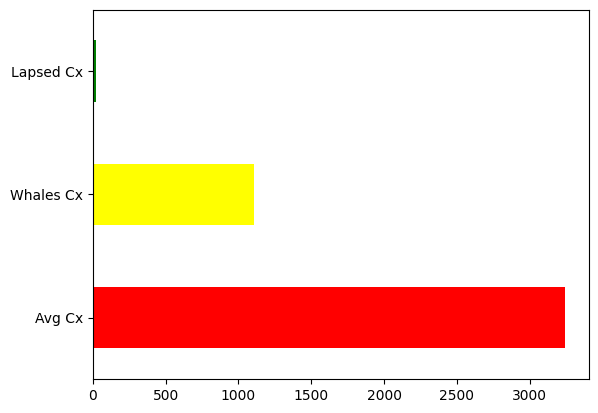

In [40]:
result.plot(kind = 'barh', color = ['red','yellow','green'])

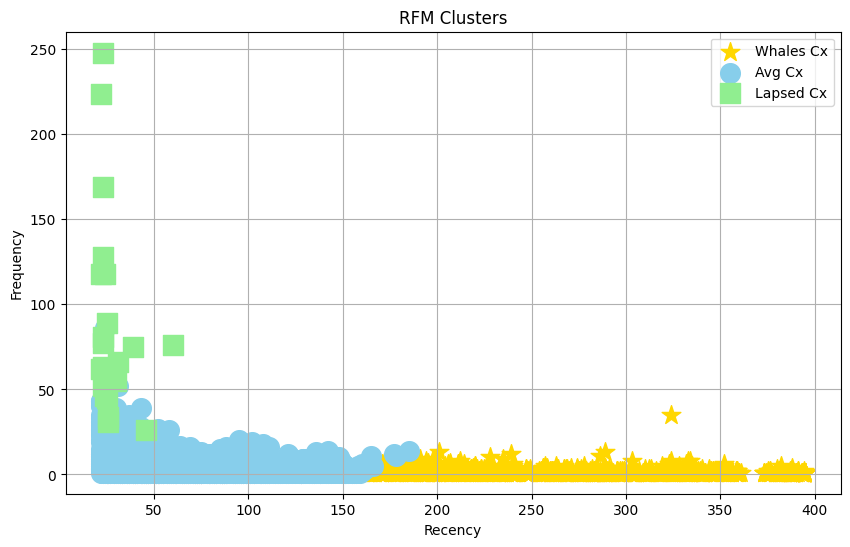

In [46]:
# This shows the relationship between Recency and Frequency

import matplotlib.pyplot as plt

# Define colors and markers for each cluster
cluster_colors = {'Whales Cx': 'gold', 'Avg Cx': 'skyblue', 'Lapsed Cx': 'lightgreen'}
cluster_markers = {'Whales Cx': '*', 'Avg Cx': 'o', 'Lapsed Cx': 's' }

# Plot the clusters
plt.figure(figsize=(10, 6))

for cluster, color in cluster_colors.items():
    plt.scatter(RFM.loc[RFM['group'] == cluster, 'Recency'], 
                RFM.loc[RFM['group'] == cluster, 'Frequency'],
                label=cluster,
                color=color,
                marker=cluster_markers[cluster],
                s=200)  # Adjust size for markers

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFM Clusters')
plt.legend()
plt.grid(True)
plt.show()


### The graph shows that Lapsed Cx has the highest Frequency but low recency. 
### Whales have high Recency but very low frequency.
### Avg Cx are in the middle with moderate Recency and frequency.


In [50]:
# import matplotlib.pyplot as plt

# # Scatter plot of Monetary vs. Frequency
# plt.figure(figsize=(10, 6))
# plt.scatter(RFM['Money'], RFM['Frequency'], color='blue', alpha=0.5)
# plt.title('Money vs. Frequency')
# plt.xlabel('Money')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()


In [60]:
# import matplotlib.pyplot as plt

# # Scatter plot of Monetary vs. Frequency for each cluster
# plt.figure(figsize=(12,5))

# # Define colors for each cluster
# colors = ['blue', 'red', 'green']

# # Iterate over each cluster
# for i, cluster_label in enumerate(['Whales Cx', 'Lapsed Cx', 'Avg. Cx']):
#     cluster_data = RFM[RFM['group'] == cluster_label]
#     plt.scatter(cluster_data['Money'], cluster_data['Frequency'], color=colors[i], alpha=0.5, label=cluster_label)

# plt.title('Money vs. Frequency by Cluster')
# plt.xlabel('Money')
# plt.ylabel('Frequency')
# plt.legend()
# plt.grid(True)
# plt.show()


In [62]:
# import matplotlib.pyplot as plt

# # Scatter plot of Monetary vs. Frequency for each cluster
# plt.figure(figsize=(12, 8))

# # Define colors for each cluster
# colors = {'Whales Cx': 'blue', 'Lapsed Cx': 'red', 'Avg Cx': 'green'}

# # Iterate over each cluster
# for cluster_label, color in colors.items():
#     cluster_data = RFM[RFM['group'] == cluster_label]
#     plt.scatter(cluster_data['Money'], cluster_data['Frequency'], color=color, alpha=0.5, label=cluster_label)

# plt.title('Monetary vs. Frequency by Cluster')
# plt.xlabel('Monetary')
# plt.ylabel('Frequency')
# plt.legend()
# plt.grid(True)
# plt.show()


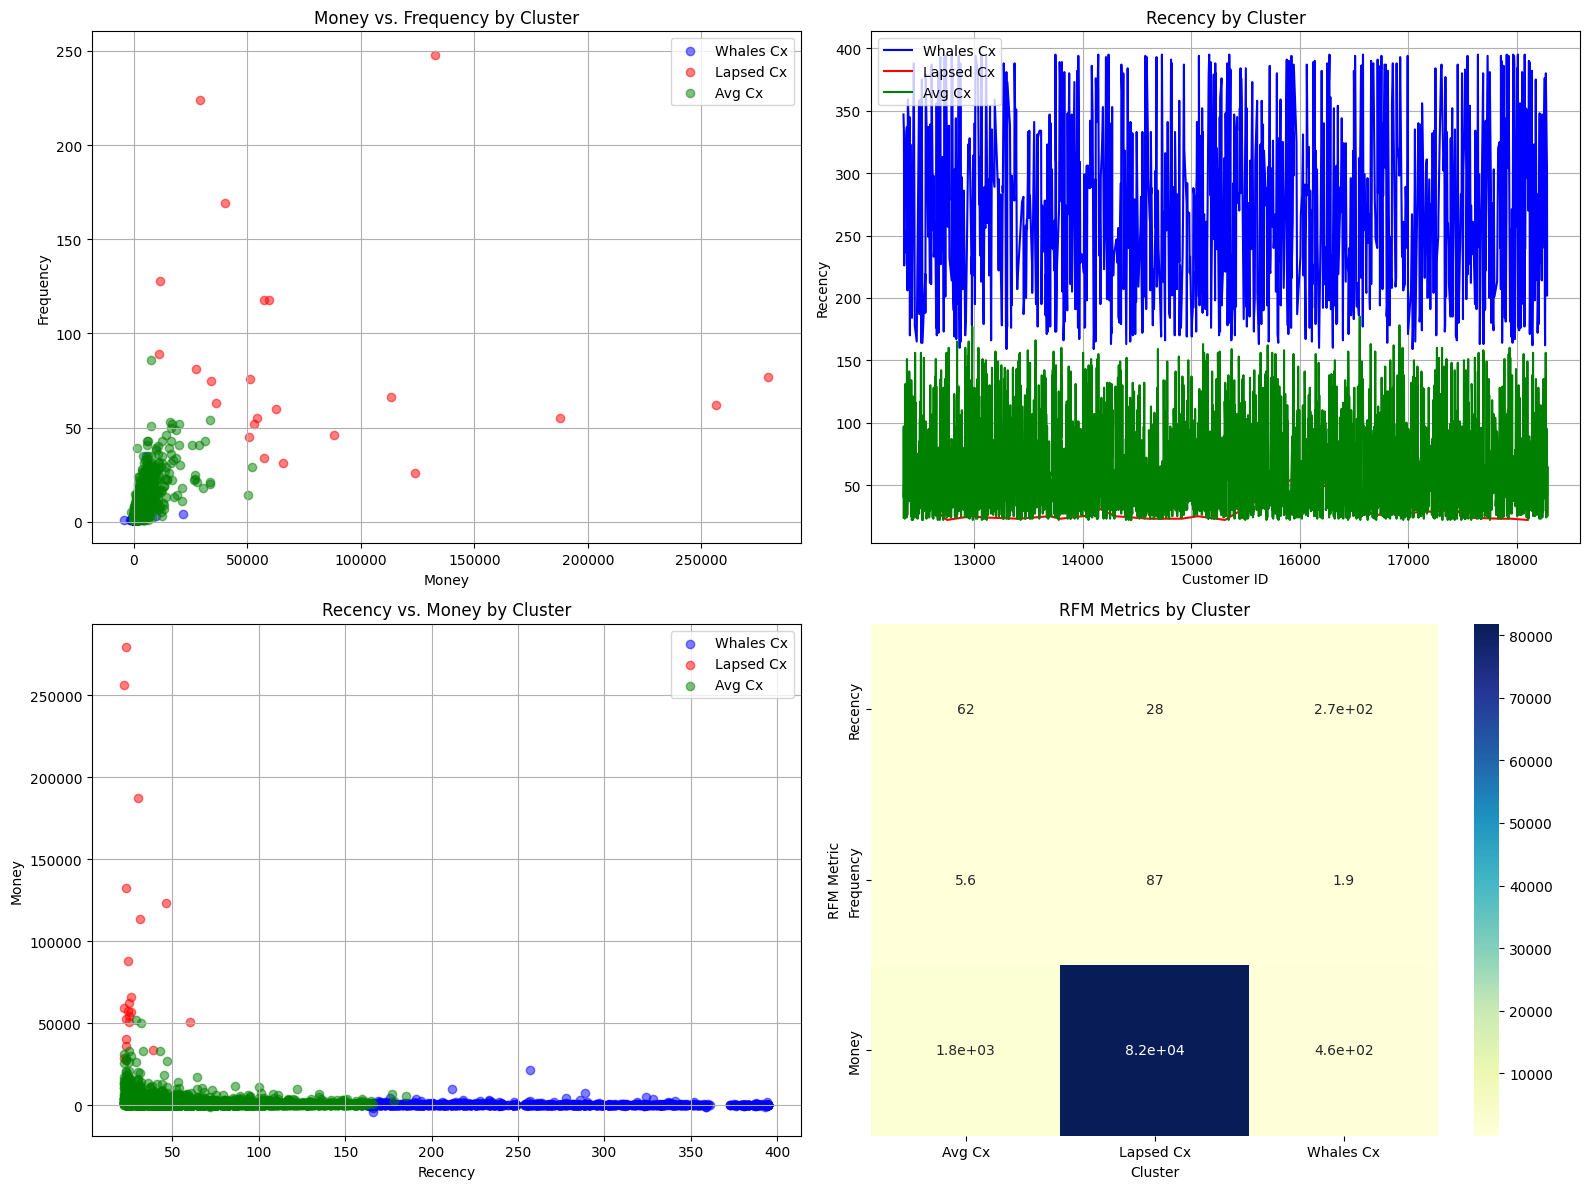

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Scatter plot of Monetary vs. Frequency for each cluster
for i, (cluster_label, color) in enumerate(colors.items()):
    cluster_data = RFM[RFM['group'] == cluster_label]
    axs[0, 0].scatter(cluster_data['Money'], cluster_data['Frequency'], color=color, alpha=0.5, label=cluster_label)

axs[0, 0].set_title('Money vs. Frequency by Cluster')
axs[0, 0].set_xlabel('Money')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Line graph of Recency by Cluster
for cluster_label, color in colors.items():
    cluster_data = RFM[RFM['group'] == cluster_label]
    axs[0, 1].plot(cluster_data.index, cluster_data['Recency'], color=color, label=cluster_label)

axs[0, 1].set_title('Recency by Cluster')
axs[0, 1].set_xlabel('Customer ID')
axs[0, 1].set_ylabel('Recency')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Scatter plot of Recency vs. Monetary
for i, (cluster_label, color) in enumerate(colors.items()):
    cluster_data = RFM[RFM['group'] == cluster_label]
    axs[1, 0].scatter(cluster_data['Recency'], cluster_data['Money'], color=color, alpha=0.5, label=cluster_label)

axs[1, 0].set_title('Recency vs. Money by Cluster')
axs[1, 0].set_xlabel('Recency')
axs[1, 0].set_ylabel('Money')
axs[1, 0].legend()
axs[1, 0].grid(True)
j
# Heatmap of RFM metrics by Cluster
sns.heatmap(RFM.groupby('group').mean()[['Recency', 'Frequency', 'Money']].T, cmap='YlGnBu', annot=True, ax=axs[1, 1])
axs[1, 1].set_title('RFM Metrics by Cluster')
axs[1, 1].set_xlabel('Cluster')
axs[1, 1].set_ylabel('RFM Metric')

# Adjust layout
plt.tight_layout()
plt.show()
